In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
import seaborn as sns

In [2]:
df = pd.read_csv(r"data/carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


<Figure size 1500x800 with 0 Axes>

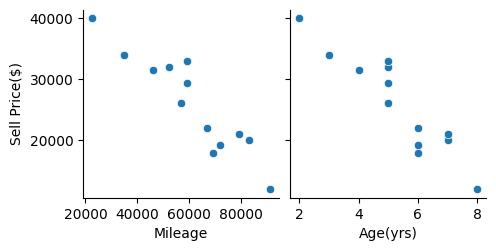

In [3]:
%matplotlib inline
plt.figure(figsize=(15,8))
sns.pairplot(df, x_vars=['Mileage', 'Age(yrs)'], y_vars=['Sell Price($)'])
plt.show()

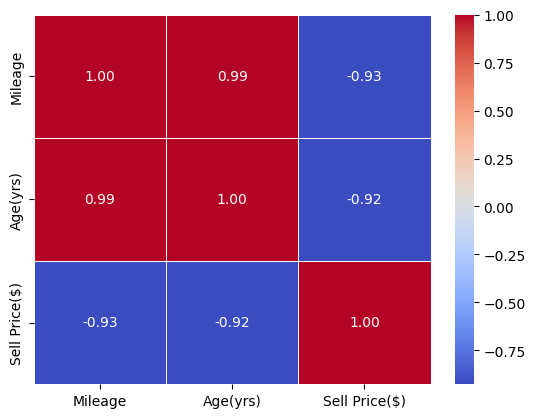

In [4]:
sns.heatmap(df[['Mileage', 'Age(yrs)']+['Sell Price($)']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

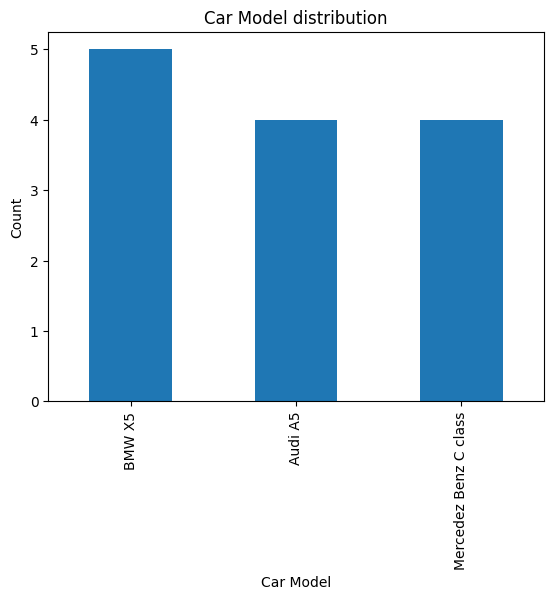

In [5]:
#sns.countplot(df['Car Model'])
df['Car Model'].value_counts().plot(kind='bar')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.title('Car Model distribution')
plt.show()

<Axes: xlabel='Car Model', ylabel='Sell Price($)'>

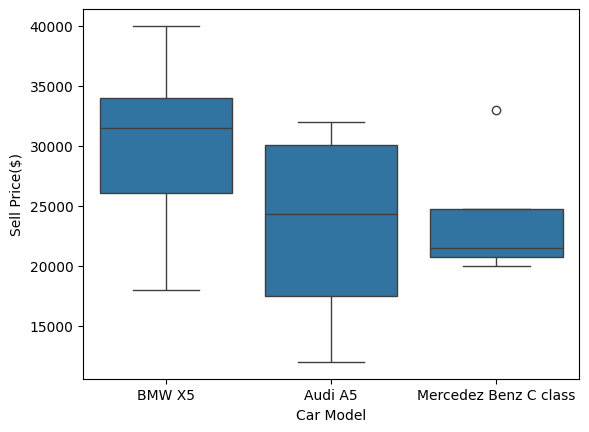

In [6]:
#sns.barplot(x='Car Model', y='Sell Price($)', data=df)
#sns.violinplot(x='Car Model', y='Sell Price($)', data=df) 
sns.boxplot(x='Car Model', y='Sell Price($)', data=df) # or try barplot, violinplot

In [7]:
# pandas dummies for categorical features
dummies = pd.get_dummies(df['Car Model'], drop_first=True) # drop_first to avoid multicolinearity
dummies.head()

,BMW X5,Mercedez Benz C class
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [8]:
dummies = dummies.astype(int)
dummies.head()

,BMW X5,Mercedez Benz C class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [9]:
#using sklean encoders
le = LabelEncoder()
le

LabelEncoder()

In [10]:
Car_model_le = le.fit_transform(df['Car Model'])
Car_model_le

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2])

In [11]:
le

LabelEncoder()

In [12]:
#using OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False) # Set sparse_output=False to get a NumPy array
ohe_array = ohe.fit_transform(df[['Car Model']])
ohe_array

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [13]:
ohe_df = pd.DataFrame(ohe_array, columns=ohe.get_feature_names_out(['Car Model']))
ohe_df

,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,1.0


In [14]:
df = df.drop(columns=["Car Model"])
df.head()

,Mileage,Sell Price($),Age(yrs)
0,69000,18000,6
1,35000,34000,3
2,57000,26100,5
3,22500,40000,2
4,46000,31500,4


In [15]:
final_df = pd.concat([df, ohe_df], axis=1)
final_df.shape

(13, 5)

In [16]:
X_cols = ['Mileage', 'Age(yrs)', 'Car Model_BMW X5', 'Car Model_Mercedez Benz C class']
y_col = 'Sell Price($)'

In [17]:
final_df.head()

,Mileage,Sell Price($),Age(yrs),Car Model_BMW X5,Car Model_Mercedez Benz C class
0,69000,18000,6,1.0,0.0
1,35000,34000,3,1.0,0.0
2,57000,26100,5,1.0,0.0
3,22500,40000,2,1.0,0.0
4,46000,31500,4,1.0,0.0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(final_df[X_cols], final_df[y_col], test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(10, 3, 10, 3)

In [20]:
reg = linear_model.LinearRegression()

In [21]:
reg.fit(X_train[X_cols], y_train)	

LinearRegression()

In [22]:
reg.coef_

array([-7.22311030e-01,  2.88245033e+03, -3.56444965e+03,  5.13077757e+03])

In [23]:
reg.intercept_

np.float64(55358.60356245718)

In [24]:
print(f"Training score: {reg.score(X_train[X_cols], y_train)}")

Training score: 0.9770384435697265


In [25]:
y_predicted = reg.predict(X_test[X_cols])
y_predicted

array([23603.9620918 , 29389.24411966, 19249.394839  ])

In [26]:
y_test

11    21000
9     22000
0     18000
Name: Sell Price($), dtype: int64

In [27]:
import joblib

In [28]:
joblib.dump(reg, 'regression_model')

['regression_model']

In [29]:
model = joblib.load('regression_model')
model.coef_

array([-7.22311030e-01,  2.88245033e+03, -3.56444965e+03,  5.13077757e+03])

In [30]:
model.intercept_

np.float64(55358.60356245718)

In [31]:
# mercedes_benz that is 4 yrs old with mileage 45000
model.predict([[45000, 4, 0, 1]])

C:\Users\amrkaur\.conda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([39515.18611555])

In [32]:
# bmw_x5 that is 7 yrs old with mileage 86000
model.predict([[86000, 7, 1, 0]])

C:\Users\amrkaur\.conda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9852.55766157])